## Hubble's constant 

The Universe has been considered to be static, that is the galaxies and the other celestial bodies are stationary or moving in the periodic trajectories as dictated by the laws of gravity. The assumption had been significant enough for Albert Einstein to introduce a constant in his equations of General Theory of Relativity accounting for and incorporating the static nature of the Universe on the massive scale because the theory predicted otherwise. However, in the past century, the galaxies appeared to be redshifted, indicating their drift from each other. Upon analysing the spectural lines and their shift, of many galaxies and stars, a relationship was noticed between the velocities of the galaxies moving away and their respective distances from each other. A linear and direct proportion was inferred and the constant of proportionality is called Hubble's constant as it is attributed to Edwin Hubble. 

The relationship is as follows:  
    $v \propto D$                      
 $v = H_0D$   

 Where,       
 $v$ is the drift velocity away, measured in km/s    
 $D$ is the distance between the two bodies, measured in Mpc (1 Mega Parsec ~ 3,260,000 light years) [1]   
 $H_0$ is the Hubble's constant whose unit is $s^{-1}$


### *Question 1*                             
###### Loading and plotting the data

In [2]:
#importing the packages to use throughout this coding

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
xdata, ydata, yerror = np.loadtxt("hubble_data.csv",delimiter=',',unpack=True) # uploading and unpacking the data in the file  
print("our x values or the drift velocity: ", xdata) # printing the individual arrays just to be clear
print("our y values or the distance: ", ydata)    
print("errors on the y-values or the distance: ", yerror)   

our x values or the drift velocity:  [ 2997.92458   3597.509496  4197.094412  4796.679328  5696.056702
  6895.226534  7794.603908  9293.566198 11092.32095  12891.07569
 15289.41536  17987.54748  20985.47206  24582.98156  29079.86843
 34176.34021  40172.18937 ]
our y values or the distance:  [ 38.97421667  59.67613575  58.67162922  66.63668877  82.92570962
  97.23112378 112.3102167  141.156321   163.6656431  193.6038969
 213.9055825  270.1486631  306.2207743  390.2323504  447.3534677
 527.9269922  650.9837401 ]
errors on the y-values or the distance:  [13.09199001 23.05675467 10.60492452 11.10174356 16.31815462 12.56544864
 15.79248846 18.44966847 21.40363907 33.49798905 45.75723619 38.62197682
 46.45148095 49.10579808 61.7358336  45.50476729 57.88044981]


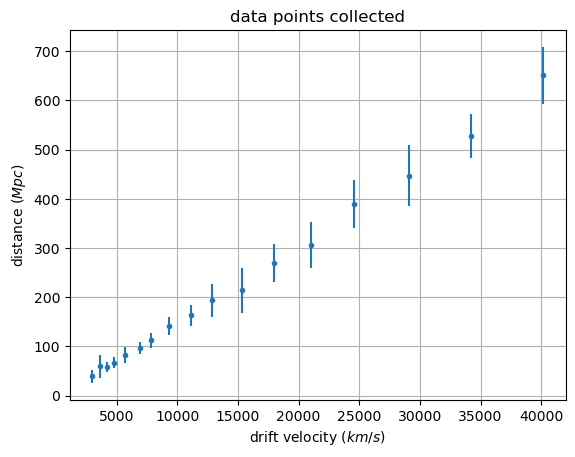

In [4]:
# labelling the graph
plt.title("data points collected")
plt.xlabel("drift velocity ($km/s$)")
plt.ylabel("distance ($Mpc$)")

# Plot data 
plt.errorbar(xdata,ydata,yerr=yerror,fmt='.')
plt.grid() # adding grid for convinienace in observing the data points and respective errors

### *Question 2*                                        
###### Linear regression using NumPy

Calculating the unweighted parameters

In [5]:
x, y, dy = np.loadtxt('hubble_data.csv',delimiter=',',unpack=True) # uploading and unpaking the data in the file
degree=1 # Since a linear line is 1 degree polynomial
coeffs_uw, errors_uw = np.polyfit(x,y,degree,cov=True)
m_uw, c_uw = coeffs_uw  # unpacking the gradient(m) and y-intercept(c) from output 1️⃣
dm_uw, dc_uw = np.sqrt(np.diag(errors_uw))

# Gradient and y-intercept with uncertainities as accurate as possible in this programming
print(f"The unweighted gradient (m) = {m_uw:} +- {dm_uw:}")
print(f"The unweighted y-intercept (c) = {c_uw:} +- {dc_uw:}")

# Gradient and y-intercept with uncertainities correct to 5 significant figues
print(f"The unweighted gradient (m) to 5sf = {m_uw:.4f} +- {dm_uw:.4f}")
print(f"The unweighted y-intercept (c) to 5sf = {c_uw:.4f} +- {dc_uw:.4f}")

The unweighted gradient (m) = 0.01597939731196561 +- 0.0002206588105827228
The unweighted y-intercept (c) = -11.624040905828377 +- 4.078725830535066
The unweighted gradient (m) to 5sf = 0.0160 +- 0.0002
The unweighted y-intercept (c) to 5sf = -11.6240 +- 4.0787


Calculating the weighted parameters

In [6]:
degree = 1 # Since a linear line is 1 degree polynomial

coeffs, errors = np.polyfit(x,y,degree,w=1/dy,cov='unscaled')
#using covariance matrix as unscaled because the residuals are weighted
m, c = coeffs  # unpacking the gradient(m) and y-intercept(c) from output 
dm, dc = np.sqrt(np.diag(errors)) 

# Gradient and y-intercept with uncertainities as accurate as the programming allows
print(f"The weighted gradient m = {m} +- {dm}")
print(f"The weighted y-intercept c = {c} +- {dc}")

# Gradient and y-intercept with uncertainities correct to 5 significant figues
print(f"The weighted gradient (m) to 5sf = {m:.4f} +- {dm:.4f}")
print(f"The weighted y-intercept (c) to 5sf = {c:.4f} +- {dc:.4f}")

The weighted gradient m = 0.01574034318901381 +- 0.000827025757910185
The weighted y-intercept c = -8.32585537874202 +- 7.37387236367192
The weighted gradient (m) to 5sf = 0.0157 +- 0.0008
The weighted y-intercept (c) to 5sf = -8.3259 +- 7.3739


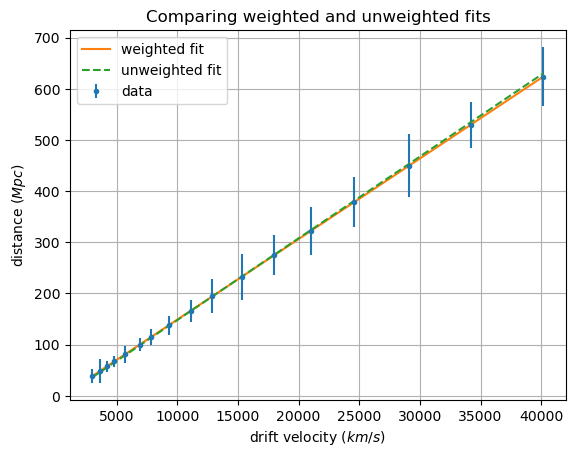

In [7]:
y_uw  = m_uw * x + c_uw
y = m * x + c

# Labelling the graph
plt.figure()
plt.title("Comparing weighted and unweighted fits")
plt.xlabel("drift velocity ($km/s$)")
plt.ylabel("distance ($Mpc$)")

# Plot data and lines with errors
plt.errorbar(x,y,yerr=dy,fmt='.',label="data")
plt.plot(x,y,'-',label='weighted fit')
plt.plot(x,y_uw,'--',label='unweighted fit')
plt.legend()
plt.grid()

### *Question 3*                       
###### Linear regression from scratch

$$
m = \frac
{\sum_i w_i \sum_i w_i x_i y_i - \sum_i w_i x_i \sum_i w_i y_i}
{\sum_i w_i \sum_i w_i x_i^2 - \left(\sum_i w_i x_i\right)^2}
$$

$$
\Delta m = \sqrt{\frac{
\sum_i w_i
}{
\sum_i w_i \sum_i w_i x_i^2 - \left( \sum_i w_i x_i \right)^2
}}
$$

$$
c = \frac
{\sum_{i=1}^n w_i y_i - m\sum_{i=1}^n w_i x_i}
{\sum_{i=1}^n w_i}
$$

$$
\Delta c = \sqrt{\frac{
\sum_i w_i x_i^2
}{
\sum_i w_i \sum_i w_i x_i^2 - \left( \sum_i w_i x_i \right)^2
}}
$$

In [9]:
w = 1/dy**2 # weight of each error in y
w_i = np.sum(w) 

p = w_i * np.sum(w * x * y) - np.sum(w * x) * np.sum(w * y)
q = w_i * np.sum(w * x**2) - (np.sum(w * x))**2

w_m = p/q
error_wm = np.sqrt(w_i/q)

w_c = (np.sum(w * y) - w_m * np.sum(w * x)) / w_i
error_wc = np.sqrt(np.sum(w * x**2)/q)

# Gradient and y-intercept with uncertainities as accurate as the programming allows
print (f"weighted gradient (m) is {w_m} +- {dm}")
print (f"weight y-intercept (c) is {w_c} +- {dc}")

# Gradient and y-intercept with uncertainities correct to 5 significant figues
print (f"weighted gradient (m) to 4 decimal places is {w_m:.4f} +- {error_wm:.4f}")
print (f"weighted y-intercept (c) to 4 decimal places is {w_c:.4f} +- {error_wc:.4f}")

weighted gradient (m) is 0.015740343189013815 +- 0.000827025757910185
weight y-intercept (c) is -8.325855378742066 +- 7.37387236367192
weighted gradient (m) to 4 decimal places is 0.0157 +- 0.0008
weighted y-intercept (c) to 4 decimal places is -8.3259 +- 7.3739


$$m=\frac{\sum_{i=1}^n(x_i-\bar{x})y_i}{\sum_{i=1}^n(x_i-\bar{x})^2}$$

$$c=\bar{y}-m\bar{x}$$

$$\Delta m = \sqrt{\frac{S}{(n-2)D}}$$

$$\Delta c = \sqrt{\left( \frac{1}{n}+\frac{\bar{x}^2}{D} \right)
\frac{S}{(n-2)}}$$

In [10]:
y_predicted_line_unweighted = m_uw * np.array(x) + c_uw
residual_line = y - y_predicted_line_unweighted # residuals

S = np.sum(residual_line**2) # getting the sense of the errors in the data
x_bar = np.sum(x) / len(x) # mean value of x
y_bar = np.sum(y) / len(y) # mean value of y
D = np.sum((x - x_bar)**2)

uw_m = np.sum(y * (x - x_bar)) / np.sum ((x - x_bar)**2)
error_uwm = np.sqrt(S / (15 * D)) # as n = 17 so n-2 = 15
uw_c = y_bar - m_uw * x_bar
error_uwc = np.sqrt ((1 / 17 + x_bar**2 / D) * S / (15))

# Gradient and y-intercept with uncertainities as accurate as the programming allows
print (f"unweighted gradient (m) is {uw_m} +- {error_uwm}")
print (f"unweight y-intercept (c) is {uw_c} +- {error_uwc}")

# Gradient and y-intercept with uncertainities correct to 5 significant figues
print (f"unweighted gradient (m) to 5sf = {uw_m:.4f} +- {error_uwm:.4f}")
print (f"unweighted y-intercept (c) to 5sf = {uw_c:.4f} +- {error_uwc:.4f}")

unweighted gradient (m) is 0.015740343189013805 +- 6.197381254764753e-05
unweight y-intercept (c) is -11.86281401372517 +- 1.1455431550061113
unweighted gradient (m) to 5sf = 0.0157 +- 0.0001
unweighted y-intercept (c) to 5sf = -11.8628 +- 1.1455


In [11]:
print(f"                       Weighted                                          Unweighted")
print(f"Method     Gradient                Y-intercept                Gradient               Y-intercept")
print("-------------------------------------------------------------------------------------------------")
print(f"NumPy      {m:.4f}+-{dm:.4f}        {c:.4f}+-{dc:.4f}            {m_uw:.4f}+-{dm_uw:.4f}         {c_uw:.4f}+-{dc_uw:.4f}")
print(f"Equations  {w_m:.4f}+-{error_wm:.4f}        {w_c:.4f}+-{error_wc:.4f}            {uw_m:.4f}+-{error_uwm:.4f}         {uw_c:.4f}+-{error_uwc:.4f}")
print(f"           --------------         --------------            --------------          ---------------")
print(f"Difference {(m - w_m):.4f}+{dm - error_wm:.4f}         {(c - w_c):.4f}+-{dc - error_wc:.4f}            {(m_uw - uw_m):.4f}+-{dm_uw - error_uwm:.4f}          {(dc_uw - error_uwc):.4f}+-{dc_uw - error_uwc:.4f}")

                       Weighted                                          Unweighted
Method     Gradient                Y-intercept                Gradient               Y-intercept
-------------------------------------------------------------------------------------------------
NumPy      0.0157+-0.0008        -8.3259+-7.3739            0.0160+-0.0002         -11.6240+-4.0787
Equations  0.0157+-0.0008        -8.3259+-7.3739            0.0157+-0.0001         -11.8628+-1.1455
           --------------         --------------            --------------          ---------------
Difference -0.0000+-0.0000         0.0000+-0.0000            0.0002+-0.0002          2.9332+-2.9332


As we can see that the values of the weighted parameters are the same and independent of the method use, ie. Numpy or the equations of statistics.
While there is a difference in the parameters calculated by the two techniques.       
As far as the uncertaninity in the gradient and y-intercept is concerned, it seems to be lesser in magnitutude as compared to those using Numpy in the above calculations.

Using Numpy is easier and faster because one has to spend a considerable amount of time in thinking to write the equations in order to implement them from scratch.
Moreover, Numpy is also more reliable because one is prone to human errors such as mistyping the codes which can lead to wrong answers. 
But using Numpy comes with its drawbacks too, including but not limited to the human tendency to feed incorrect data to irrelevent codes (such as labelling 2 different constants with the same variable and then running the code with that ambiguous variable). Not to mention the difficulty to debug the code if the answer does not come out as expected, specailly if the codes are correct, then it becomes hectic to try to find mistakes in the data one feeds to the codes.
Using equations makes it easy to identify any mistake because we can see the processing codes in front of our eyes, unlike the case with Numpy, where the data processing is not shown, only outcome is. One can see each step of the processing.


### *Question 4*                            
###### Goodness of fit

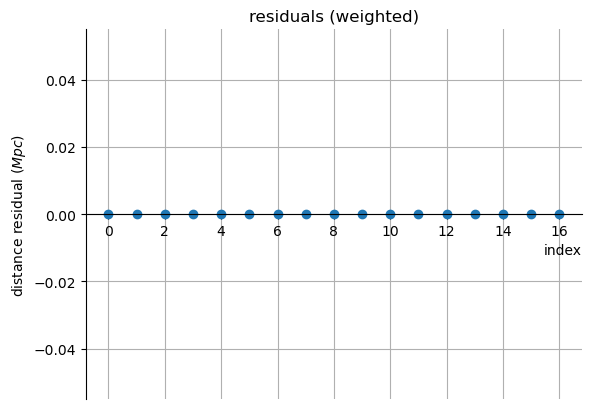

In [12]:
y_predicted_line_weighted = m * np.array(x) + c

# Residual is difference between actual and predicted y value
residual_line = y - y_predicted_line_weighted

# Removing the three boundary walls enclosing the graph 

axes = plt.gca()
axes.spines['bottom'].set_position('zero')
axes.spines['top'].set_color('none')
axes.spines['right'].set_color('none')

plt.grid(True) # adding grid

# labelling the axis and then title

plt.xlabel('index',loc='right')
plt.ylabel('distance residual ($Mpc$)')
plt.title('residuals (weighted)')

# Plot the residuals

plt.plot(residual_line,'o');

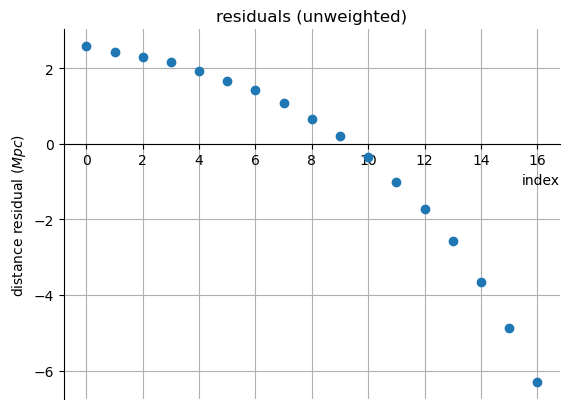

In [13]:
y_predicted_line_unweighted = m_uw * x + c_uw

# Residual is difference between actual and predicted y value
residual_line = y - y_predicted_line_unweighted

# Create figure and choose settings suitable for residual plot
axes = plt.gca()
axes.spines['bottom'].set_position('zero')
axes.spines['top'].set_color('none')
axes.spines['right'].set_color('none')
plt.grid(True)
plt.xlabel('index',loc='right')
plt.ylabel('distance residual ($Mpc$)')
plt.title('residuals (unweighted)')

# Plot the residuals
plt.plot(residual_line,'o')

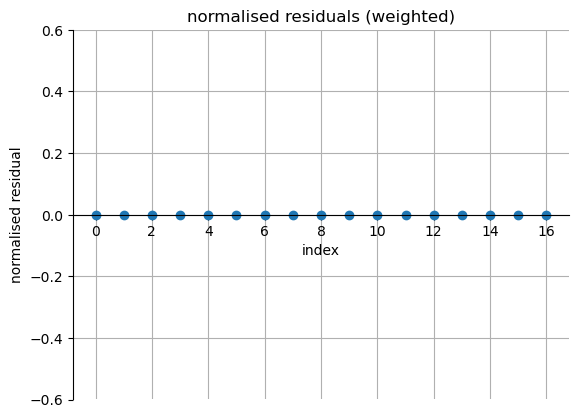

In [14]:
# Calculate the normalised residuals
residual_line_weighted = (y - y_predicted_line_weighted) / dy
# Plot the residuals for each if the fits.
axes = plt.gca()
axes.spines['bottom'].set_position('zero')
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')

plt.xlabel('index')
plt.ylabel('normalised residual')
plt.title('normalised residuals (weighted)')

axes.set(ylim=(-0.6,0.6))

plt.grid(True)

plt.plot(residual_line_weighted,'o')

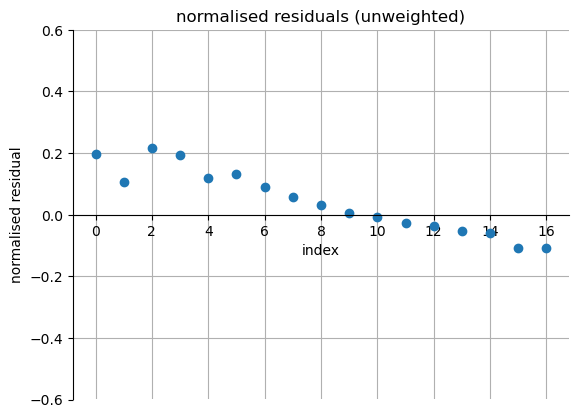

In [15]:
residual_line_unweighted = (y - y_predicted_line_unweighted) / dy

axes = plt.gca()
axes.spines['bottom'].set_position('zero')
axes.spines['top'].set_color('none')
axes.spines['right'].set_color('none')

plt.xlabel('index')
plt.ylabel('normalised residual')
plt.title('normalised residuals (unweighted)')

axes.set(ylim=(-0.6,0.6))

plt.grid(True)

plt.plot(residual_line_unweighted,'o')

In [16]:
residual_weighted = ydata - y_predicted_line_weighted
chi2_of_weighted = np.sum((residual_weighted/dy)**2)

reduced_chi2_of_weighted = chi2_of_weighted / 15

print(f"Chi-squared of weighted fit is {chi2_of_weighted}")
print(f"reduced Chi-squared of weighted fit is {reduced_chi2_of_weighted}")             

Chi-squared of weighted fit is 0.9497111534416312
reduced Chi-squared of weighted fit is 0.06331407689610874


In [17]:
residual_unweighted = ydata - y_predicted_line_unweighted
chi2_of_unweighted = np.sum((residual_unweighted/dy)**2)
                            
reduced_chi2_of_unweighted = chi2_of_unweighted / 15
                            
print(f"Chi-squared of unweighted fit is {chi2_of_unweighted}")
print(f"Reduced Chi-squared of uweighted fit is {reduced_chi2_of_unweighted}")

Chi-squared of unweighted fit is 1.1597873000224086
Reduced Chi-squared of uweighted fit is 0.07731915333482724


In [18]:
print(f"Fit        Chi-squared  Reduced Chi-squared")
print("---------------------------------------------")
print(f"Weighted     {chi2_of_weighted:.2f}        {reduced_chi2_of_weighted:.2f}")
print(f"Unweighted   {chi2_of_unweighted:.2f}        {reduced_chi2_of_unweighted:.2f}")

Fit        Chi-squared  Reduced Chi-squared
---------------------------------------------
Weighted     0.95        0.06
Unweighted   1.16        0.08


By visual obervation only, the spread of residuals and normalised residuals of the weighted fit is 0 for each point. Which is an ideal condition. Howevever, the residuals of the unweighted fit have a non-random spread about 0, as the data points seem to follow a clear pattern which indicates a biased fit. Although the normalised residuals are $<<2, but again, there seems to be more data points lying on the positive quadrant, making a pattern.  

According to $\chi^2$ test, weighted fit is better as it's value is lower than unweighted's. But $\chi^2$ does not take into account the order of polynomial used to forcefully fit all the data points, which can be misleading. 

That's why we look further, calculating reduced $\chi^2$ which does take into consideration the number of parameters used in the fit. Hence a simplified and a better fit is the one with reduced $\chi^2$ nearer to $1$. This seems to be the case with unweighted fit. 

A value of reduced $\chi^2 < 1$ shows that the model is overfitting and/or the experimental errors are overestimated.
Since both the fits are straight lines connecting very closley to the data points, we can rule out the possibility that they are overfitted by forcing a biased model. 

Since a straight line fits almost all the data points, it seems to be a good fit. A polynomial would not be a better fit due to the higher number of parameters used.

In conclusion, weighted fit seems a better choice

### *Question 5*                   
###### The Hubble constant

In [19]:
H_w = 1/m
error_H_w = dm/m**2
H_uw = 1/m_uw
error_H_uw = dm_uw/m_uw**2

print(f"The Hubble constant derived from the weighted fit is {H_w} +- {error_H_w} / Mpc")
print(f"The Hubble constant derived from the unweighted fit is {H_uw} +- {error_H_uw} / Mpc")

The Hubble constant derived from the weighted fit is 63.53101631849831 +- 3.3380331223198914 / Mpc
The Hubble constant derived from the unweighted fit is 62.58058301430338 +- 0.8641725807248799 / Mpc


In [20]:
print(f"Weighted Hubble constant to 3 sig fig is {H_w:0.1f} +- {error_H_w:.2f} / s")
print(f"Unweighted Hubble constant to 3 sig fig is {H_uw:0.1f} +- {error_H_uw:.2f} / s")

Weighted Hubble constant to 3 sig fig is 63.5 +- 3.34 / s
Unweighted Hubble constant to 3 sig fig is 62.6 +- 0.86 / s


The most recently calculated value of the Hubble's constant is 73.4 + 0.99 - 1.22 $s^{-1}$, as found out on 8th Feb 2022. And the value has always been greater than both of the values calculated above (from the weighted and unweighted fits respectively) for the last 2 decades. 
63.53 $s^{-1}$ is closer to the accepeted value than 62.58  $s^{-1}$, hence the weighted fit is more suitable to be used for calculating the Hubble's constant.


Hubble's constant in its simplest explanation can be thought of as the rate of expansion of the Universe. 
It provided an experimental proof of the non-static nature of the Universe. 
The gives the indirect measure of the ultimate fate of the Universe, ie. rate of acceleration as time passes.
In short this is a very significant number concerning the research in Astrophysics.
Perhaps the most amazing result of finding the Hubble's constant is the current age of the Universe.          

$H_0 = v / d$                                               
as $v / d = t^{-1}$   

Therfore,   
$t = H_0^{-1}$                                              

The units of $H_0$ is $km/s/Mpc$                                                        
and $1 Mpc = 3.26 * 10^6  light  years $                                            
As $1 light year = 9.461 * 10^{12} Km$

Therfore,                                                             
units of $H_0$ is $(3.26 * 10^6 * 9.461 * 10^{12} / 60 / 60 / 24 / 356 billion years)^{-1}$                               
As $H_0 = 63.5 Km/s/Mpc$  

Therefore,                                                    
$t = 3.26 * 10^6 * 9.461 * 10^{12} / 60 / 60 / 24 / 356 / 63.5 billion years$                                

In [21]:
t = 3.26 * 10**6 * 9.461 * 10**12 / 60 / 60 / 24 / 356 / H_w
print ({t})

{15783564858.078005}


In [22]:
uncertainty = t - ((3.26 * 10**6 * 9.461 * 10**12 / 60 / 60 / 24 / 356 / (H_w+error_H_w)) + ( 3.26 * 10**6 * 9.461 * 10**12 / 60 / 60 / 24 / 356 / (H_w-dm)))/2

In [23]:
print(uncertainty)

393846804.1772289


In [24]:
print(f"The age of the Universe, using the data above, is {t*10**(-9):.1f}+-{uncertainty*10**(-9):.1f} billion yeasrs")

The age of the Universe, using the data above, is 15.8+-0.4 billion yeasrs


The most precise current age of the Universe is 13.8 +- 0.1 billion years




### References:         

WL Freedman, et al., Final results from the Hubble Space Telescope key project to measure the Hubble Constant. Astrophys J 553, 47–72 (2001).

PHAS0007 Data Analysis booklet

PHAS0007 Computing component

PHAS0007 Computing component: Explanatory notebook by Ben Waugh, last updated 2022-11-14 (Unit 4)
    
22020084's assigment for unit 4